<a href="https://colab.research.google.com/github/qpwisu/computer_vision/blob/master/CV_histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

영상으로부터 히스토그램을 구하고 표현하기

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

from keras.datasets import mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()
img = x_train[0]
height, width = img.shape
print(height, width)

28 28


주어진 영상으로부터 히스토그램 및 정규화된 히스토그램을 구하기 위한 프로그램

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if __name__ == '__main__':


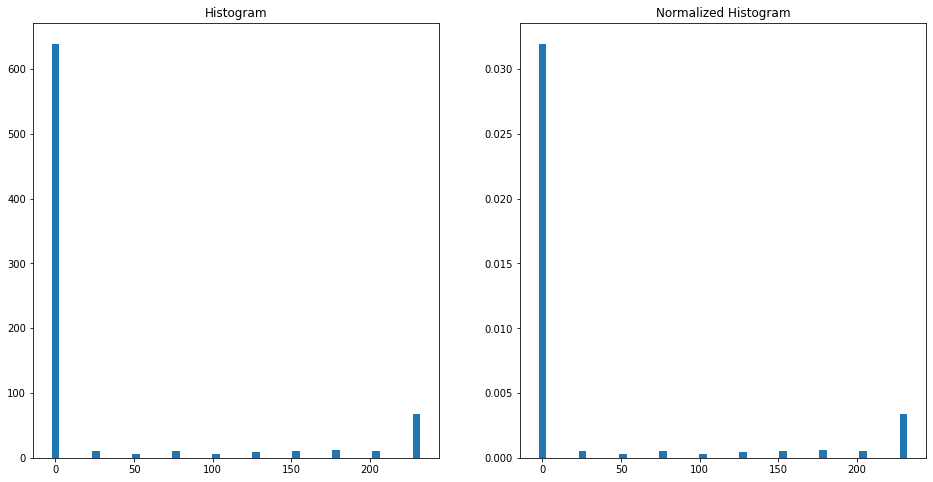

In [ ]:
img = x_train[0]

#Histogram
hist, bins = np.histogram(
    img,bins=10,range=(np.min(img),np.max(img)))

#Normalized Histogram
hist_norm, bins_norm = np.histogram(
    img,bins=10,range=(np.min(img),np.max(img)),normed=True)

#Visualization
plt.figure(figsize=(16,8))
#Subplot 1
plt.subplot(1,2,1)
plt.bar(bins[:-1],hist,width=5)
plt.title('Histogram')
#Subplot 2
plt.subplot(1,2,2)
plt.bar(bins_norm[:-1],hist_norm,width=5)
plt.title('Normalized Histogram')
#Show plot
plt.show()




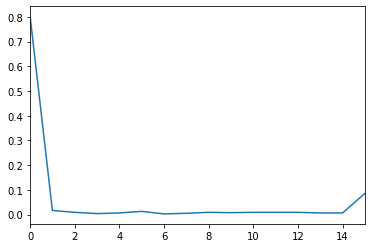

In [ ]:
def histogram(img):
     #bins = np.zeros(256, np.int32)
     bins = np.zeros(16, np.int32)
     height, width = img.shape
     for i in range(0, height):
        for j in range(0, width):
#            bins[img[i][j]] += 1
             bins[int(img[i][j]/16)] += 1
  
     bins = bins/(width*height)  #normalized histogram

     return bins

bins = histogram(img)

plt.plot(bins)
#plt.xlim([0,256])
plt.xlim([0,15])

plt.show()

Histogram Streching(히스토그램 스트레칭) and Histogram Equalization (히스토그램 평활화)

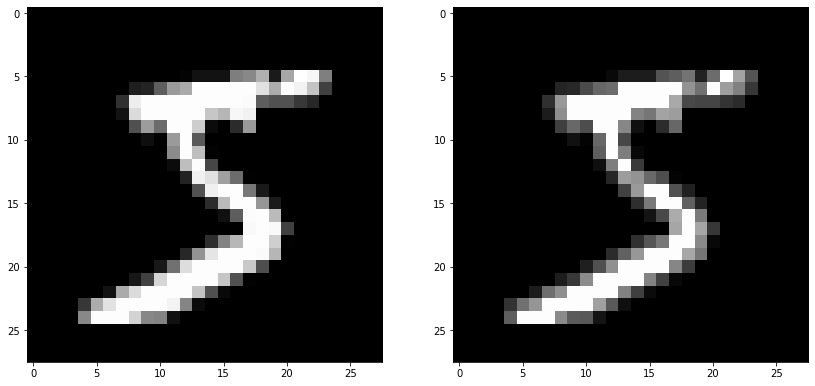

In [ ]:
equalized_img = cv2.equalizeHist(img) #opencv를 이용하는 방법의 예


plt.figure(figsize=(14,7))

plt.subplot(121)
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.imshow(equalized_img, cmap='gray')

plt.show()


OpenCV 라이브러를 이용하여 영상 filtering

In [ ]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()